In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class Image:
    def __init__(self, path):
        self.image = cv2.imread(path, 0)

    def show_image(self):
        cv2.imshow('Before modification', self.image)
        cv2.waitKey(0)

    def cal_tot(self):
        self.tot_pxls = self.image.shape[0] * self.image.shape[1]

    def intensity_dist(self):
        self.intensity_probabilities = np.zeros(256)
        self.intensity_counts = np.zeros(256, dtype=int)
        for row in self.image:
            for pixel in row:
                intensity = pixel
                self.intensity_counts[intensity] += 1
        self.intensity_probabilities = self.intensity_counts / self.tot_pxls

    def show_intensity_dist(self):
        plt.plot(self.intensity_counts, color='purple')
        plt.title('Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.show()
        print('the length of the img ', len(self.intensity_counts))
        print('counting of intensities ', self.intensity_counts)
        print('probability of intensities ', self.intensity_probabilities)
    
    
    def unifrom_dist(self):
        num_intensities=256
        uniform_probability=1/num_intensities
        self.uniform_distribution=np.full(num_intensities, uniform_probability)
        print('unifrom distribution ',self.uniform_distribution)
    
    
    def histogram_specification(self):
        # Calculate the cumulative distribution function (CDF) of the input image's histogram
        input_hist = self.intensity_counts
        input_cdf = np.zeros_like(input_hist)
        input_cdf[0] = input_hist[0]
        for i in range(1, 256):
            input_cdf[i] = input_cdf[i-1] + input_hist[i] # to caclulate the cumulative prob

        # Normalize the input CDF
        input_cdf_normalized = input_cdf / input_cdf.max() #input_cdf.max to calculate the cumulative count and divid e with it to scale within 0 and 1

        # Calculate the cumulative distribution function (CDF) of the desired histogram
        desired_cdf = np.zeros_like(self.uniform_distribution)
        desired_cdf[0] = self.uniform_distribution[0]
        for i in range(1, 256):
            desired_cdf[i] = desired_cdf[i-1] + self.uniform_distribution[i]
        # Normalize the desired CDF
        desired_cdf_normalized = desired_cdf / desired_cdf.max()

        # Map the input image's intensities to the desired histogram using CDFs
        matched_image = np.zeros_like(self.image)
        for i in range(self.image.shape[0]):
            for j in range(self.image.shape[1]):
                intensity = self.image[i, j]
                closest_index = np.argmin(np.abs(desired_cdf_normalized - input_cdf_normalized[intensity])) #finds the index of the closest value in the desired_cdf_normalized array to the normalized input CDF value at the current intensity. 
                matched_intensity = closest_index
                matched_image[i, j] = matched_intensity

        return matched_image.astype(np.uint8)#8-bit integer array

unifrom distribution  [0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.0039

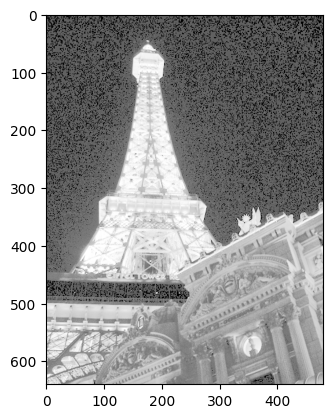

In [15]:
img=Image("D:\desktop\Sixth Semester\Image Processing\Assignments\Assignment 2/01.jpg")
img.show_image()
img.cal_tot()
img.intensity_dist()
# img.show_intensity_dist()
img.unifrom_dist()
matched_image = img.histogram_specification()
plt.imshow(matched_image, cmap='gray')
